# Linear Algebra for Data Science
## Chapter 13

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from latools import imatrix, matrix, permutation, frobenius_distance
import seaborn as sns
import scipy
from ucimlrepo import fetch_ucirepo 
import statsmodels.api as sm

### Exercise 13.1

Prove that eigenvectors A^-1 are the same as A, and lambdas are inverted lambdas of A

Mathematical proof:

$$ A^{-1}A \textbf{v} = \textbf{v} <=> A^{-1}\lambda \textbf{v} = \textbf{v} <=> \lambda A^{-1} \textbf{v} = \textbf{v} <=>\lambda^{-1} \lambda A^{-1}\textbf{v} = \lambda^{-1}\textbf{v} <=> A^{-1} \textbf{v} = \lambda^{-1} \textbf{v} $$

Same logic can be applied to every eigenvector of A, and in reverse to every eigenvector of A^(-1)

In [2]:
A = imatrix(5)
A = A.T @ A

In [3]:
l, v = np.linalg.eig(A)

In [4]:
m, u = np.linalg.eig(np.linalg.inv(A))

<AxesSubplot:>

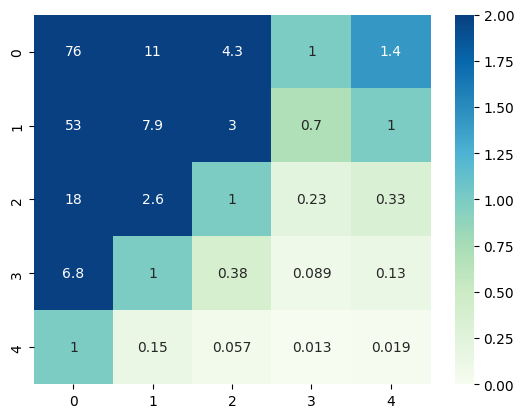

In [5]:
sns.heatmap(np.abs(np.array([[i * j for j in m] for i in l])), 
            annot=True, 
            vmin=0, 
            vmax=2, 
            cmap='GnBu'
           )

In [6]:
v, u #same, but rearranged and in different directions

(array([[-0.09560523,  0.01676015,  0.74186982, -0.66187886, -0.04608994],
        [ 0.55194572,  0.2278033 , -0.47392868, -0.61844433,  0.1907349 ],
        [ 0.01121415,  0.95962004,  0.17141174,  0.21799746, -0.04581214],
        [-0.49330898,  0.11369225, -0.39084859, -0.31512252, -0.7011815 ],
        [-0.66538414,  0.11844077, -0.20706563, -0.18060422,  0.68391642]]),
 array([[ 0.04608994,  0.66187886,  0.74186982, -0.09560523,  0.01676015],
        [-0.1907349 ,  0.61844433, -0.47392868,  0.55194572,  0.2278033 ],
        [ 0.04581214, -0.21799746,  0.17141174,  0.01121415,  0.95962004],
        [ 0.7011815 ,  0.31512252, -0.39084859, -0.49330898,  0.11369225],
        [-0.68391642,  0.18060422, -0.20706563, -0.66538414,  0.11844077]]))

In [7]:
v[0] @ v[2].T

-1.1102230246251565e-16

### Exercise 13.2

In [8]:
A = imatrix(2)

In [9]:
A

array([[ 6, -1],
       [ 9, -6]])

In [10]:
l, u = np.linalg.eig(A)

In [11]:
u 
#Luckily we got matrix with real eigenvectors. It's not guaranteed, but for the sake
# of the experiment we would suggest to repeat matrix generation until one obtains 
# the matrix that satisfies that condition

array([[0.77940383, 0.08896226],
       [0.62652188, 0.996035  ]])

In [12]:
v_1 = A @ u[:, 0]
v_2 = A @ u[:, 1]

(-10.0, 10.0, -10.0, 10.0)

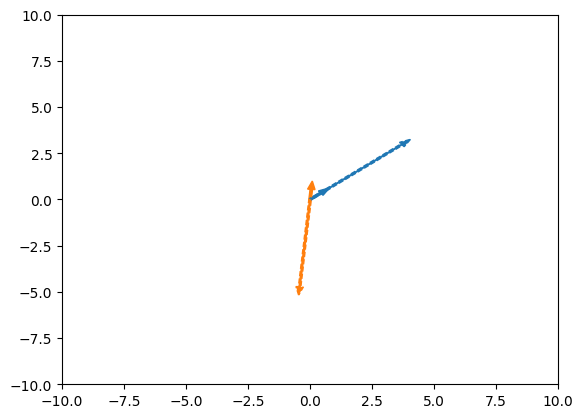

In [13]:
plt.arrow(0, 0, u[0, 0], u[1,0], color='C0', head_width=.3, width=.1, length_includes_head=True,)
plt.arrow(0, 0, u[0, 1], u[1,1], color='C1', head_width=.3, width=.1, length_includes_head=True,)

plt.arrow(0, 0, *v_1, color='C0', ls='--',  head_width=.3, width=.1, length_includes_head=True,)
plt.arrow(0, 0, *v_2, color='C1', ls='--', head_width=.3, width=.1, length_includes_head=True,)

plt.axis([-10,10,-10,10])

In [14]:
np.linalg.norm(u[:, 1])

0.9999999999999998

## Exercise 13.3

In [15]:
A = matrix(5)
A = A.T @ A

In [16]:
A

array([[ 0.93749751,  0.75024397,  0.58086201,  0.73900495, -0.27068596],
       [ 0.75024397,  1.79341594,  2.81378644,  1.34290432,  0.37807618],
       [ 0.58086201,  2.81378644, 12.45921576, -3.66863718,  2.28462203],
       [ 0.73900495,  1.34290432, -3.66863718,  5.71572358, -0.32564699],
       [-0.27068596,  0.37807618,  2.28462203, -0.32564699,  1.55764352]])

In [17]:
l, V = np.linalg.eig(A)

In [18]:
L = l * np.eye(5)

In [19]:
A_ = V @ (l * np.eye(5)) @ np.linalg.inv(V)

In [20]:
frobenius_distance(A, A_)

1.3870902717135621e-14

In [21]:
V

array([[-0.02532327,  0.22117873,  0.49752122, -0.83229855, -0.10094776],
       [-0.16687904,  0.47522799,  0.1872169 ,  0.1424591 ,  0.83124303],
       [-0.90756349,  0.20527242,  0.0395369 ,  0.14624982, -0.33352595],
       [ 0.3453018 ,  0.82294057, -0.17461479,  0.15082772, -0.38768049],
       [-0.16913098,  0.07661838, -0.82787015, -0.49279459,  0.19315499]])

In [22]:
L_new = np.random.permutation(L) * np.eye(5)

In [23]:
A_new = V @ L_new @ np.linalg.inv(V)

In [24]:
frobenius_distance(A, A_new)

15.96116290938936

In [25]:
l

array([14.81437738,  5.74442227,  1.45702401,  0.41282393,  0.03484872])

In [26]:
l_2 = l[[1,0,2,3,4]]

In [27]:
L_2 = l_2 * np.eye(5)

In [28]:
A_2 = V @ L_2 @ np.linalg.inv(V)

In [29]:
frobenius_distance(A, A_2)

12.826853536540463

In [30]:
l_3 = l[[0,1,2,4,3]]

In [31]:
L_3 = l_3 * np.eye(5)

In [32]:
A_3 = V @ L_3 @ np.linalg.inv(V)

In [33]:
frobenius_distance(A, A_3)

0.5345376765874512

Text(0.5, 1.0, 'Reconstruction accuracy')

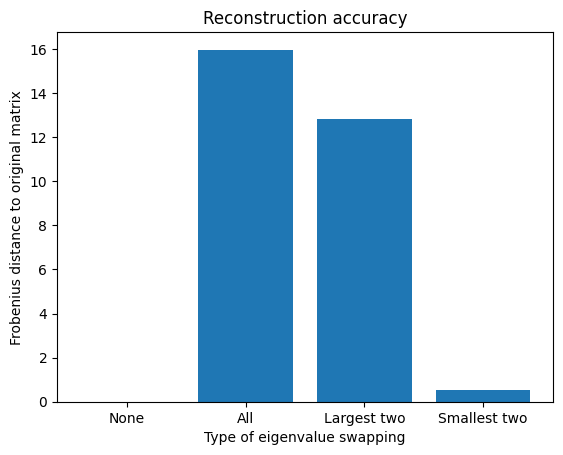

In [34]:
plt.bar(x= range(4), height=[frobenius_distance(A, x) for x in [A_, A_new, A_2, A_3]])
plt.xticks(range(4),labels=['None','All','Largest two','Smallest two'])
plt.ylabel('Frobenius distance to original matrix')
plt.xlabel('Type of eigenvalue swapping')
plt.title('Reconstruction accuracy')


### Exercise 13.4

In [35]:
eigens=[]

for i in range(123):
    A = matrix(42)
    l,_ = np.linalg.eig(A)
    l = l / (42**0.5)
    eigens.extend(l)

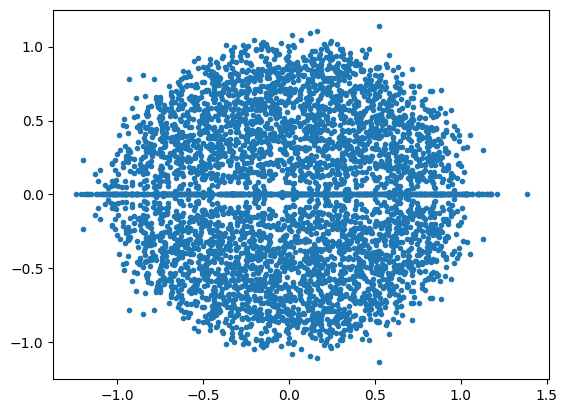

In [36]:
plt.plot(
    np.real(eigens), 
    np.imag(eigens), 
    '.')

In [37]:
# Cool

## Exercise 13.5

Analytical proof is quite fun:

Let us consider equation:

$$ (A-\lambda E)X = 0$$

where lambda is eigenvalue

$$(A-\lambda E)X = 0 <=> AX - \lambda EX = 0 <=> AX - \lambda X = 0 $$

But we know that it would be true if X is eigenvector

In [38]:
A = matrix(5)

A = A.T @ A

In [39]:
lambdas, V = np.linalg.eig(A)

In [40]:
nulls = []

for l in lambdas:
    K = A - l*np.eye(5)
    n = scipy.linalg.null_space(K)
    nulls.append(n)

In [41]:
nulls

[array([[ 0.37411664],
        [ 0.25920711],
        [ 0.09372521],
        [ 0.81920288],
        [-0.33611105]]),
 array([[ 0.5640383 ],
        [-0.58499269],
        [ 0.51165714],
        [-0.01675414],
        [ 0.27851503]]),
 array([[-0.20247374],
        [-0.75736136],
        [-0.40613296],
        [ 0.20532064],
        [-0.42226485]]),
 array([[ 0.39598518],
        [ 0.00837373],
        [-0.72315784],
        [ 0.12561078],
        [ 0.55171577]]),
 array([[-0.58659838],
        [-0.13011104],
        [ 0.20376779],
        [ 0.52028003],
        [ 0.57162999]])]

In [42]:
V

array([[-0.37411664,  0.5640383 ,  0.20247374, -0.39598518, -0.58659838],
       [-0.25920711, -0.58499269,  0.75736136, -0.00837373, -0.13011104],
       [-0.09372521,  0.51165714,  0.40613296,  0.72315784,  0.20376779],
       [-0.81920288, -0.01675414, -0.20532064, -0.12561078,  0.52028003],
       [ 0.33611105,  0.27851503,  0.42226485, -0.55171577,  0.57162999]])

## Exercise 13.6

In [43]:
A = np.diag([1,2,3,4])

In [44]:
Q,_ = np.linalg.qr(matrix(4))

In [45]:
Q @ A @ Q.T

array([[ 1.37467083,  0.13683899,  0.72924383,  0.01721211],
       [ 0.13683899,  3.21579016,  0.76165764, -0.63348471],
       [ 0.72924383,  0.76165764,  2.56994218,  0.13523099],
       [ 0.01721211, -0.63348471,  0.13523099,  2.83959683]])

In [46]:
np.linalg.inv(Q)

array([[-0.86901326, -0.12900822,  0.47236553, -0.07101863],
       [ 0.37864071, -0.60459353,  0.45079859, -0.53654311],
       [-0.27025815,  0.05669057, -0.59517351, -0.75466231],
       [-0.16854584, -0.78397049, -0.46842282,  0.37089437]])

In [47]:
Q.T

array([[-0.86901326, -0.12900822,  0.47236553, -0.07101863],
       [ 0.37864071, -0.60459353,  0.45079859, -0.53654311],
       [-0.27025815,  0.05669057, -0.59517351, -0.75466231],
       [-0.16854584, -0.78397049, -0.46842282,  0.37089437]])

### Exercise 13.7

In [48]:
# Skipped, can't calculalte eigens, matrices too big

### EXercise 13.8

In [49]:

# correlation matrix
R = np.array([[ 1,.2,.9],
              [.2, 1,.3],
              [.9,.3, 1] ])

# eigendecomposition
d,V = np.linalg.eig(R)
D = np.diag(d)

# create new data with imposed correlation
X = V @ np.sqrt(D) @ np.random.randn(3,10000)

np.corrcoef(X)

array([[1.        , 0.20848352, 0.89874401],
       [0.20848352, 1.        , 0.30776287],
       [0.89874401, 0.30776287, 1.        ]])

In [50]:
X

array([[ 0.74002806,  0.78114831,  0.32111762, ..., -0.32832591,
        -0.00731931,  1.19024983],
       [ 0.81640911,  0.94600102, -0.13789818, ..., -0.16484867,
         0.52715997, -1.19498456],
       [ 0.51998355,  1.08811516, -0.42537825, ...,  0.05676936,
        -0.07747342,  0.87684977]])

### EXercise 13.9

In [52]:
# now whiten
Y = X.T @ V @ np.linalg.inv(np.sqrt(D))

# and check the correlations
np.round( np.corrcoef(Y.T) ,3)

array([[ 1.   ,  0.001,  0.001],
       [ 0.001,  1.   , -0.003],
       [ 0.001, -0.003,  1.   ]])

### Exercise 13.10

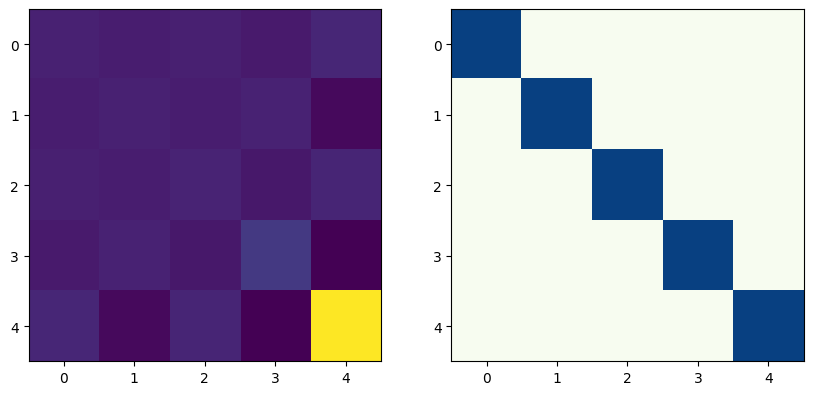

In [58]:
# two symmetric matrices and GED

A = matrix(5)
A = A.T@A
B = matrix(5)
B = B.T@B

evals,evecs = scipy.linalg.eigh( A,B )

# eigenvectors times their transposes
VV  = evecs.T @ evecs
VBV = evecs.T @ B @ evecs


# show in an image
_,axs = plt.subplots(1,2,figsize=(10,6))

axs[0].imshow(VV)


axs[1].imshow(VBV,cmap='GnBu')

### Exercise 13.11

In [66]:
A = imatrix(4, -14, 14)
A

array([[  8,   7,   2,  -1],
       [ -2,   3,   7,   8],
       [ -2,   5,  -7,   2],
       [  2, -10,   7,  -3]])

In [67]:
lambdas, V = np.linalg.eig(A)

In [71]:
np.round(V @ (lambdas*np.eye(4)) @ np.linalg.inv(V), 7)

array([[  8.+0.j,   7.+0.j,   2.+0.j,  -1.-0.j],
       [ -2.+0.j,   3.+0.j,   7.-0.j,   8.-0.j],
       [ -2.+0.j,   5.+0.j,  -7.-0.j,   2.-0.j],
       [  2.-0.j, -10.-0.j,   7.-0.j,  -3.+0.j]])

In [77]:
V.shape

(4, 4)

In [84]:
for i in range(4):
    print(f'{i}-eigv, norm is {np.linalg.norm(V[:,i]):.2f}')

0-eigv, norm is 1.00
1-eigv, norm is 1.00
2-eigv, norm is 1.00
3-eigv, norm is 1.00


In [86]:
SV = V * 7

In [87]:
np.round(SV @ (lambdas*np.eye(4)) @ np.linalg.inv(SV), 7)

array([[  8.+0.j,   7.+0.j,   2.-0.j,  -1.-0.j],
       [ -2.+0.j,   3.+0.j,   7.+0.j,   8.+0.j],
       [ -2.+0.j,   5.+0.j,  -7.+0.j,   2.+0.j],
       [  2.-0.j, -10.-0.j,   7.-0.j,  -3.-0.j]])

In [88]:
for i in range(4):
    print(f'{i}-eigv, norm is {np.linalg.norm(SV[:,i]):.2f}')

0-eigv, norm is 7.00
1-eigv, norm is 7.00
2-eigv, norm is 7.00
3-eigv, norm is 7.00


In [95]:
B = imatrix(4, -14, 14)
B = B.T @ B

In [96]:
mus, U = np.linalg.eig(A)

In [99]:
np.round(U @ (mus*np.eye(4)) @ U.T, 7)

array([[ 2.0449842-0.j,  2.7413297+0.j,  1.94825  +0.j, -2.8913533+0.j],
       [ 2.7413297-0.j, -3.1595899-0.j, -1.7928512-0.j,  1.5868609+0.j],
       [ 1.94825  -0.j, -1.7928512-0.j, -4.3043663-0.j,  4.2310862-0.j],
       [-2.8913533+0.j,  1.5868609-0.j,  4.2310862+0.j, -2.5491094+0.j]])

In [98]:
for i in range(4):
    print(f'{i}-eigv, norm is {np.linalg.norm(U[:,i]):.2f}')

0-eigv, norm is 1.00
1-eigv, norm is 1.00
2-eigv, norm is 1.00
3-eigv, norm is 1.00
